No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


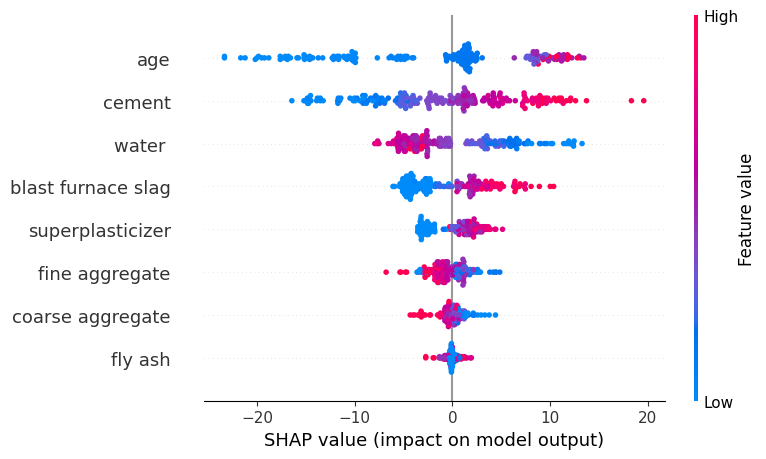

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [9]:
import shap
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# — 데이터 로드 및 분할 —
df = pd.read_csv("dataset.csv")    # 경로 수정
X = df.drop(columns=["CCS"])
y = df["CCS"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# — CatBoost CPU 모드 학습 —
model = CatBoostRegressor(task_type="CPU", verbose=0, random_state=42)
model.fit(X_train, y_train)

# — 함수형 SHAP Explainer 생성 —
explainer = shap.Explainer(
    model.predict,          # 예측 함수만 넘김
    X_train,                # 배경 데이터
    feature_names=X_train.columns.tolist()
)

# — SHAP 값 계산 —
shap_values = explainer(X_test)  # Explanation 객체 반환

# — 시각화 —
# summary_plot: 전체 피처 중요도
shap.summary_plot(shap_values.values, X_test)

# dependence_plot: 개별 피처 영향도
shap.dependence_plot("cement", shap_values.values, X_test)
